# visualization of the localization procedure

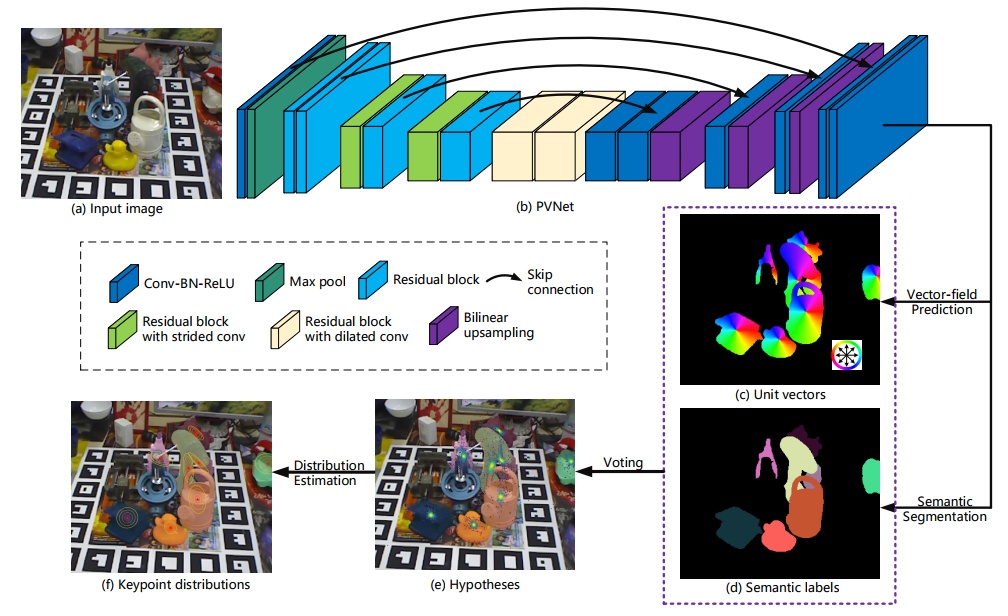

In [1]:
from tools.demo import *

net = Resnet18_8s(ver_dim=vote_num * 2, seg_dim=2)
net = NetWrapper(net).cuda()
net = DataParallel(net)

optimizer = optim.Adam(net.parameters(), lr=train_cfg['lr'])
model_dir = os.path.join(cfg.MODEL_DIR, "cat_demo")
load_model(net.module.net, optimizer, model_dir, -1)
data, points_3d, bb8_3d = read_data()
image, mask, vertex, vertex_weights, pose, corner_target = [d.unsqueeze(0).cuda() for d in data]
seg_pred, vertex_pred, loss_seg, loss_vertex, precision, recall = net(image, mask, vertex, vertex_weights)

/home/pengsida/Software/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


load model /mnt/data/home/pengsida/Codes/pvnet/data/model/cat_demo epoch 199


/home/pengsida/Software/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:225: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.")
/home/pengsida/Software/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


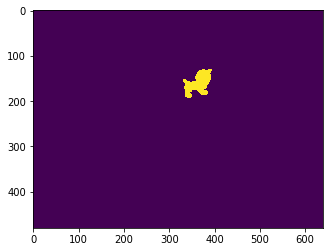

In [2]:
visualize_mask(mask)

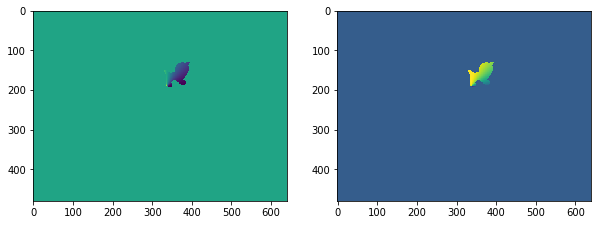

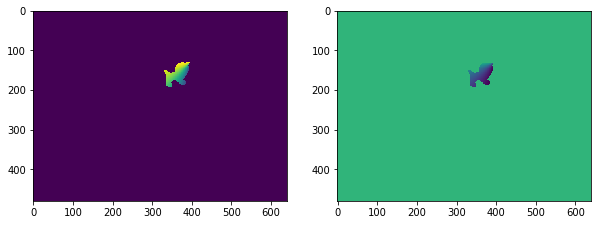

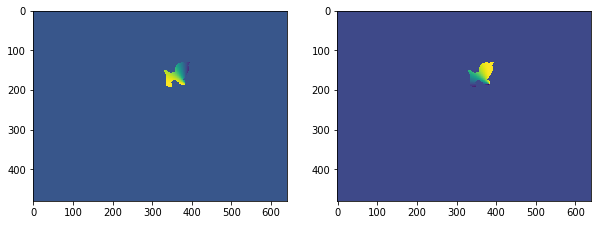

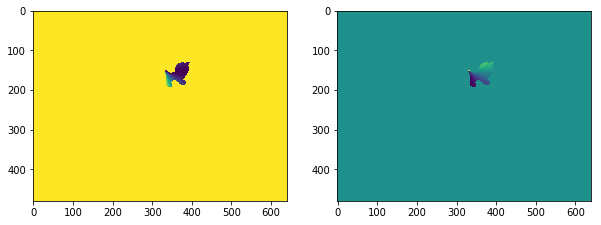

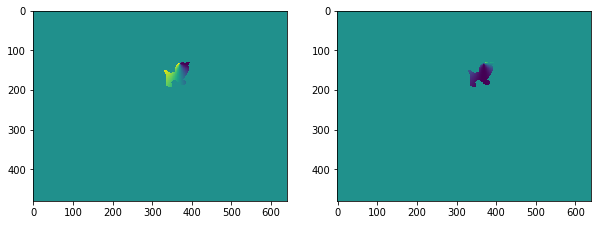

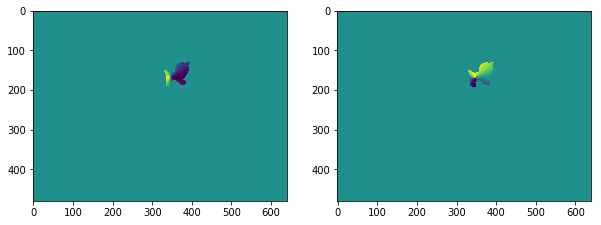

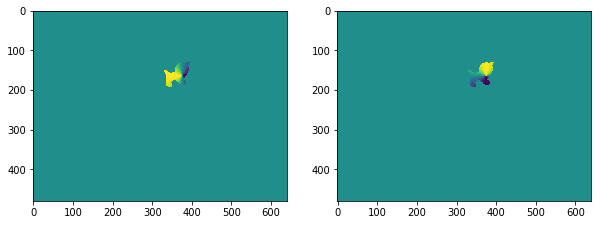

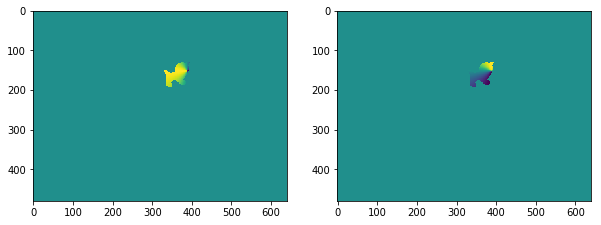

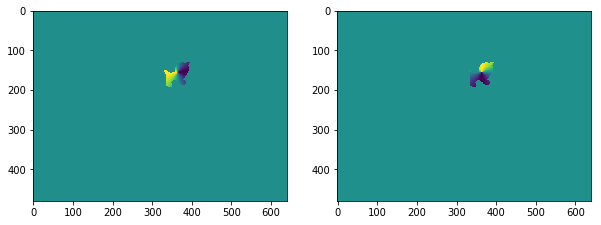

In [3]:
visualize_vertex(vertex, vertex_weights)

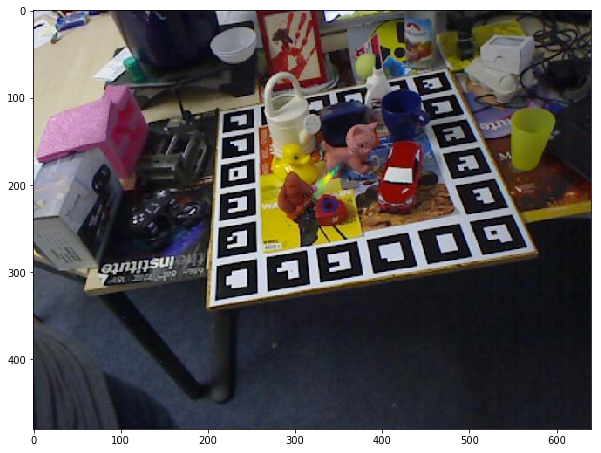

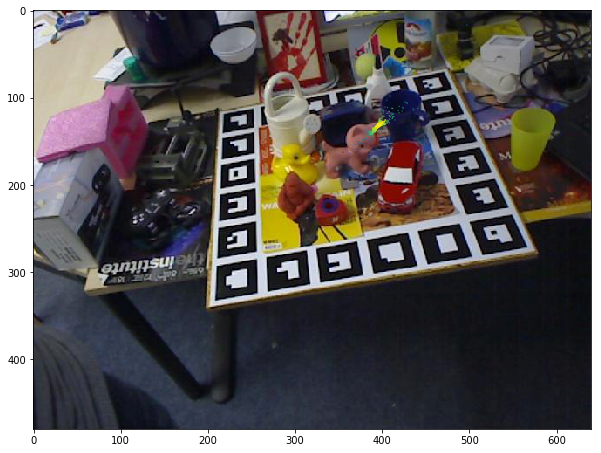

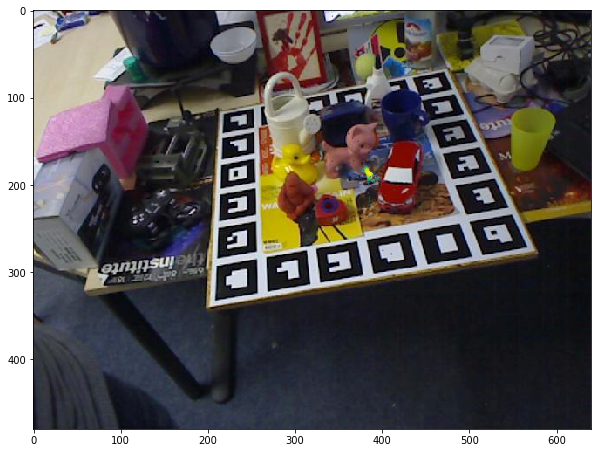

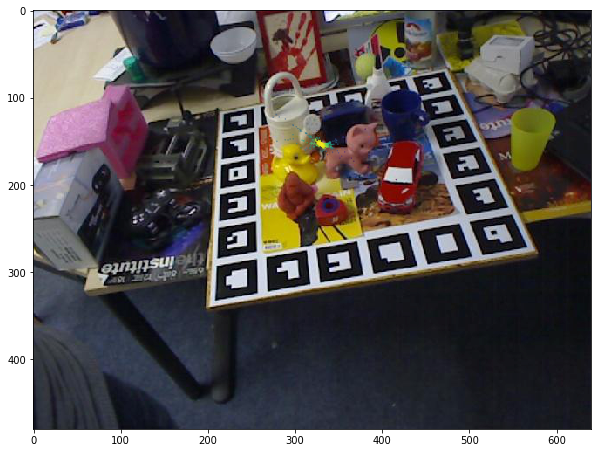

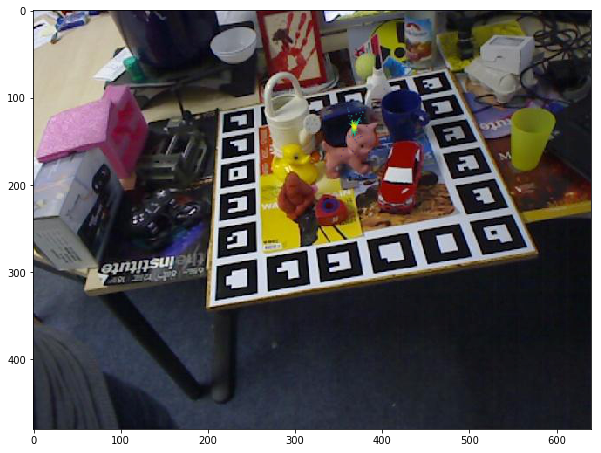

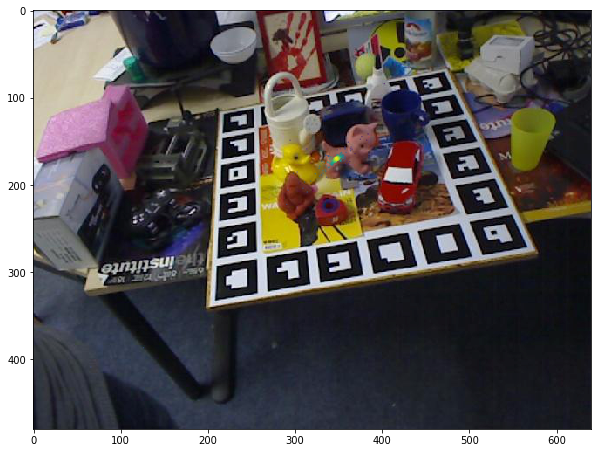

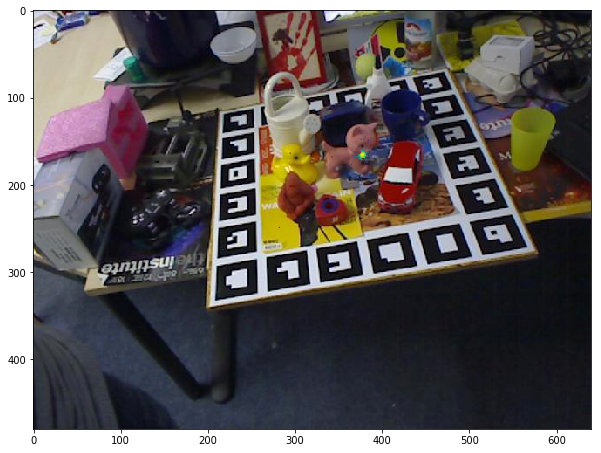

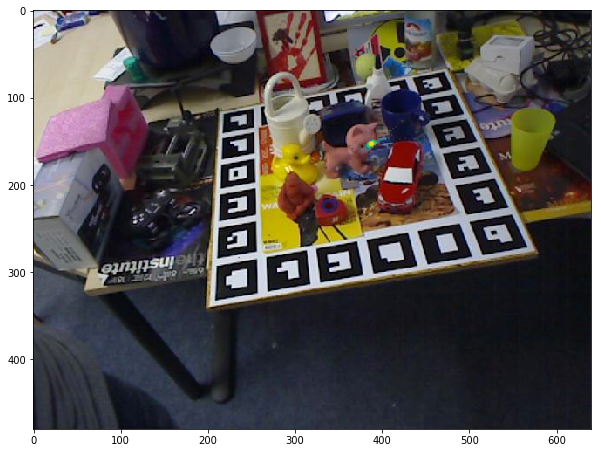

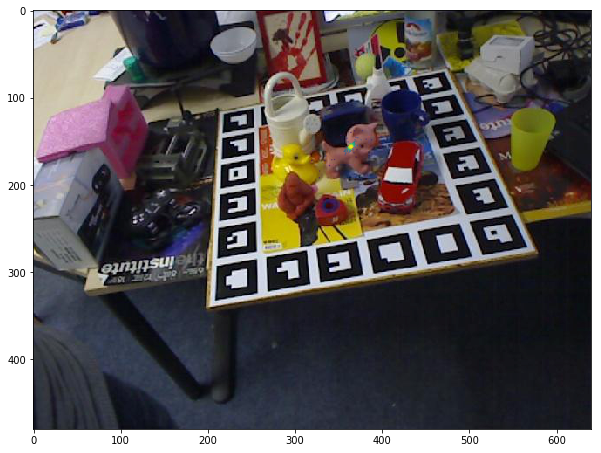

In [4]:
visualize_hypothesis(image, seg_pred, vertex_pred, corner_target)

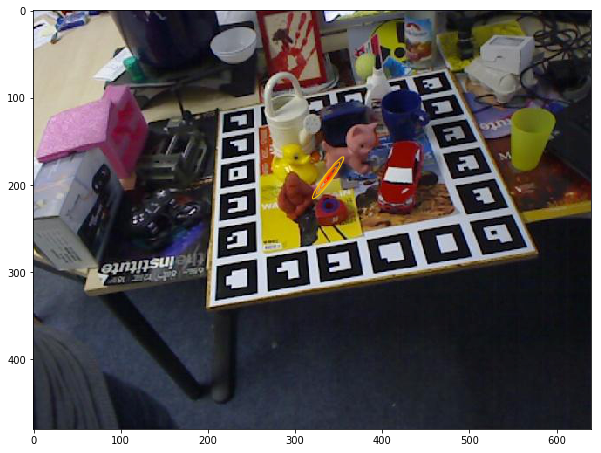

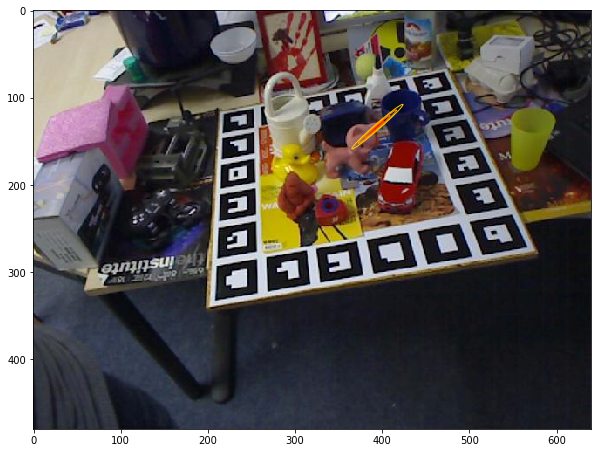

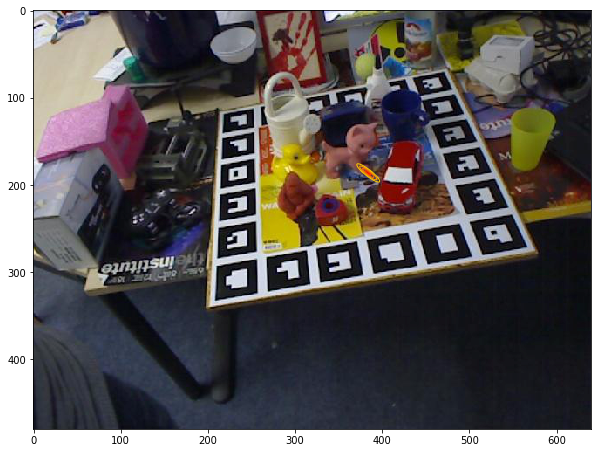

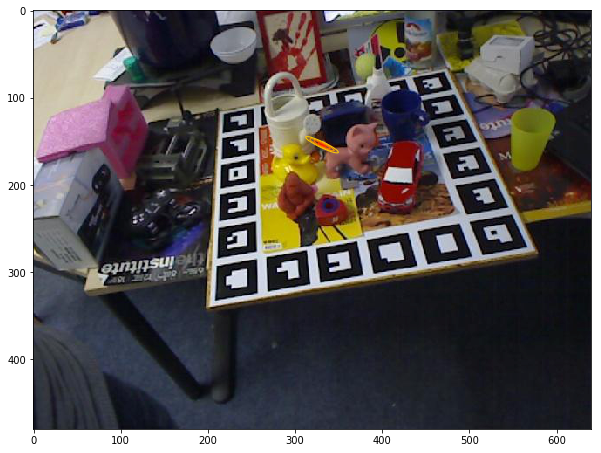

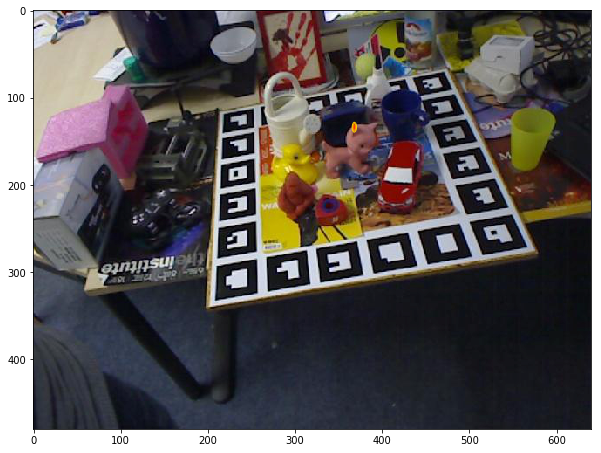

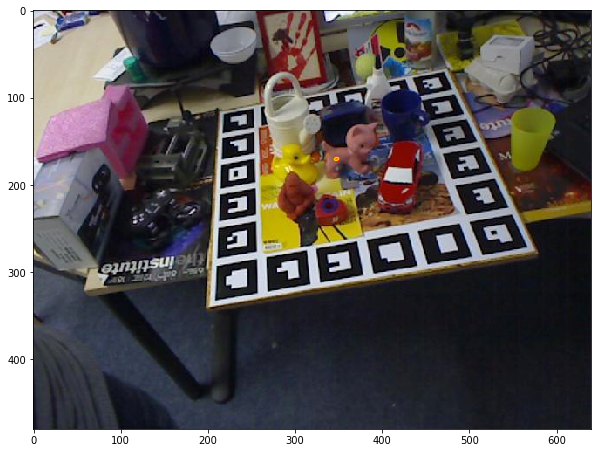

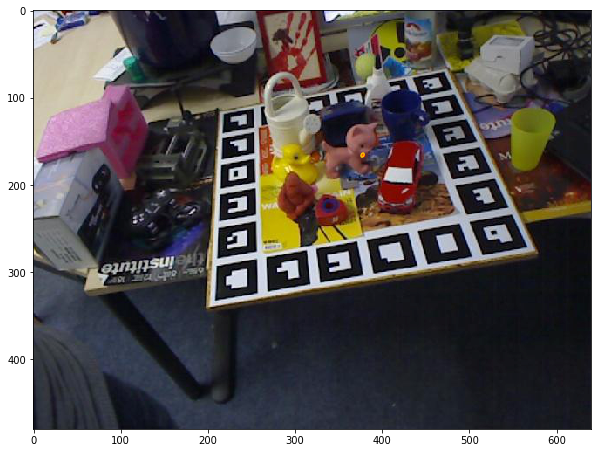

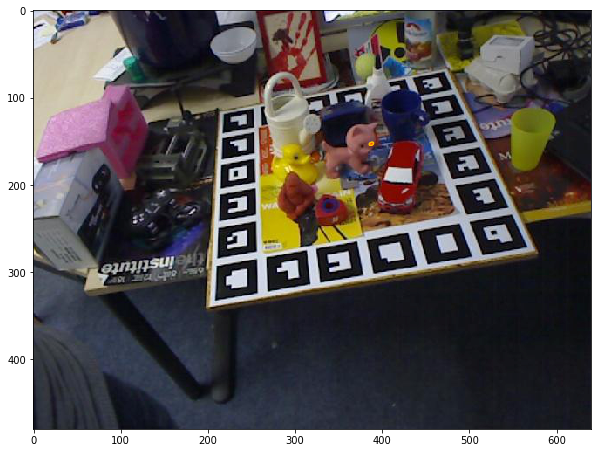

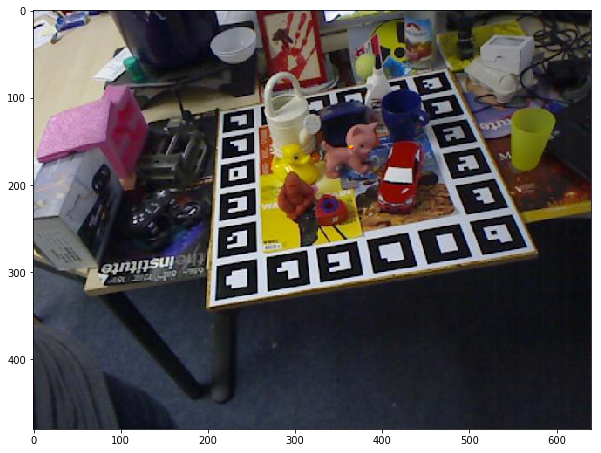

In [5]:
visualize_voting_ellipse(image, seg_pred, vertex_pred, corner_target)